## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner.
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**.
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Unsupervised Learning - Overview

In this exercise we'll look at data clustering and how we evaluate the results. We'll be using synthetic data with only two features, so we can easily visualize them and see what's happening.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

### Create synthetic data including ground truth class labels

First, we'll create synthetic data with classes that form visually evident clusters, but also some overlap between samples from different ground truth classes.

In [3]:
n = 1000
X, y = make_blobs(n_samples=n, centers=3, n_features=2, random_state=0)

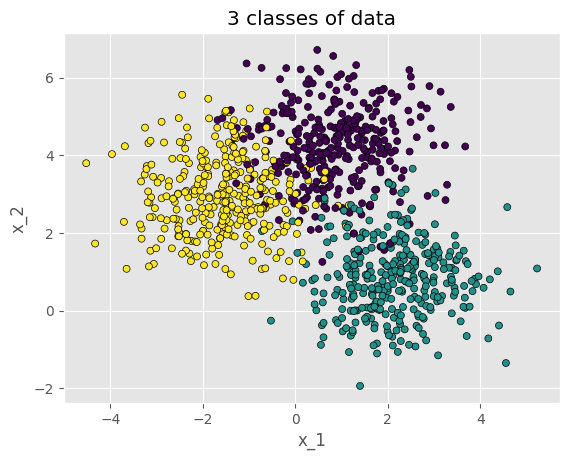

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.title("3 classes of data")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### K-means clustering

Instead of performing classification on this problem, we can withhold the labels from our model and apply a clustering algorithm instead. Let's apply [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to this example and predict the clusters each point will belong to.

In [6]:
# Create a model named `model` using KMeans with k = 3
# Fit the model to the training data
# Predict the classes of the test data and save those as `y_pred`
# YOUR CODE HERE
model = KMeans(3).fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
assert len(model.cluster_centers_) == 3
assert len(y_pred) == len(y_test)

We can access the learned cluster centroids using the `cluster_centers_` attribute of the trained model. Let's plot the centroids on top of our data.

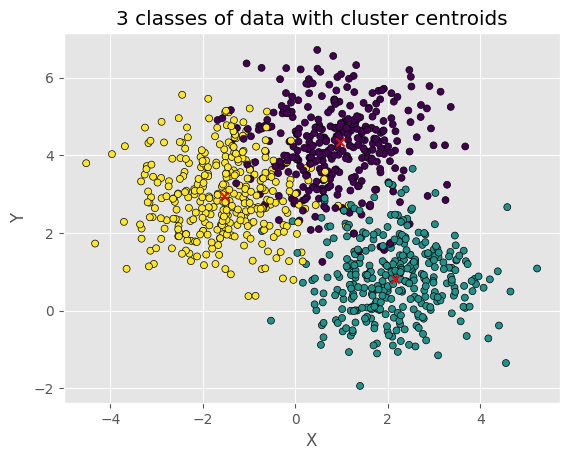

In [8]:
centroids = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="r")
plt.title("3 classes of data with cluster centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Evaluation: Contingency Table

Now that we have our predictions, we can determine how well our model works using a variety of metrics for unsupervised learning. First, let's create the contingency table/matrix for our data. __This is similar to a confusion matrix but the diagonal is irrelevant as the cluster names won't necessarily align with the original classes.__ In addition, the contigency matrix is not necessarily square, because the number of true classes may not be equal to the number of clusters (though they are in this case, since we specified `n_clusters=3`).

The following may be useful:

- Python Sets - [sets](https://docs.python.org/3.6/tutorial/datastructures.html)
- Creating a matrix with all zeros: [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)
- Boolean indexing with numpy: [indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html)
- Logic operations on numpy arrays: [logic operations](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.logic.html#logical-operations)

Creating the contingency matrix may not be very straightforward so we've provided a hint for you in case you need it. **We recommend you try to solve it on your own first** but if you're completely stuck, check out the hint below.

Note that the inputs you are given to the function are two sets of sample labelings. Each labeling contains `n` points' labels where each label is the index of the grouping they belong to.

<br>
<details>
<summary>Click here for a hint</summary>
    
There are many approaches to do this and we've outlined 2 approaches that you can think of. The first approach goes through the data and figures out where each sample should be counted in the matrix. The second approach goes through the matrix and determines what the value should be at each location.
    
    
For both approaches, we start by creating an empty matrix:
    
1. Determine the number of unique elements (classes or clusters) of y1 and y2.
    
2. Initialize a matrix of zeros, with shape equal to (number of unique y1 elements, number of unique y2 elements).

    
Approach 1: Samples based

1. Iterate over each sample
2. Add 1 to the location in the matrix where that sample belongs
    
Approach 2: Matrix based
    
1. Iterate over each element in the matrix using a pair of nested for loops.
    
2. For each matrix element, use `np.logical_and()` to help you count the number of y1 elements that fall in that row's class/cluster and the number of y2 elements that fall in that column's class/cluster.
</details>

In [9]:
from sklearn.metrics.cluster import contingency_matrix
def contingency_table(y_1, y_2):
    """Determine the contingency table/matrix based on two sets of element groupings

    Args:
        y_1 (iterable): A labeling of elements into clusters
        y_2 (iterable): Another labeling of elements into clusters

    Returns:
        np.ndarray: A matrix with shape n_groups_y1, n_groups_y2 listing the number of
                    elements from one cluster in y1 that are also in one cluster in y2
    """
    # YOUR CODE HERE
    return contingency_matrix(y_1, y_2)

In [10]:
test_cont = contingency_table(np.array([0,0,1,2,2]), np.array([1,1,1,0,2]))
assert test_cont.shape == (3,3)
assert np.all(test_cont.T == contingency_table(np.array([1,1,1,0,2]), np.array([0,0,1,2,2])))

In [11]:
contingency_table(y_test, y_pred)

array([[ 8,  1, 49],
       [ 0, 67,  4],
       [64,  1,  6]])

Let's examine our model's performance scores based on the other metrics:

In [12]:
print(f"Our model has an adjusted rand index of {adjusted_rand_score(y_test, y_pred):.4f}")

Our model has an adjusted rand index of 0.7360


In [13]:
print(f"Our model has an adjusted mutual information score of {adjusted_mutual_info_score(y_test, y_pred):.4f}")

Our model has an adjusted mutual information score of 0.6809


In [14]:
h,c,v = homogeneity_completeness_v_measure(y_test, y_pred)

print(f"Our model has a homogeneity score of {h:.4f}, completeness score of {c:.4f}, and a v-measure of {v:.4f}.")

Our model has a homogeneity score of 0.6841, completeness score of 0.6836, and a v-measure of 0.6839.


### Evaluation: Silhoutte Score

Now let's use the silhoutte score and a hyperparameter search on the validation data to determine the best value of k for KMeans. We already expect it to be 3 since we know that is the ground truth however that doesn't mean we are guaranteed the highest score at $k=3$.

The best way to understand the silhoutte score is to examine how it is computed. The treatment at [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is nice, and you can also read the [Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)) entry.

In [17]:
def score_ks(ks, features):
    """Get silhoutte scores by applying KMeans to a set of features with a variety of k values

    Args:
        ks (iterable): List of k values to experiment with
        features (iterable): The features to train the model on

    Returns:
        iterable: A list of scores of models trained using each value of k
    """
    # YOUR CODE HERE
    scores = []
    for k in ks:
      scores.append(silhouette_score(X_train, KMeans(k).fit_predict(X_train, y_test)))

    return scores

In [18]:
ks = [2,3,4,5,6,10]
scores = score_ks(ks, X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [19]:
assert len(scores) == len(ks)
assert scores[1] == max(scores)

In [20]:
maxScore = 0
bestK = ks[0]
for k, score in zip(ks, scores):
    if score > maxScore:
        bestK = k
        maxScore = score
    print(f"With k = {k}, the silhoute score is {score:.4f}")

print(f"\n\nThe best k value is k={bestK}, scoring {maxScore:.4f}.")

With k = 2, the silhoute score is 0.4708
With k = 3, the silhoute score is 0.4859
With k = 4, the silhoute score is 0.3963
With k = 5, the silhoute score is 0.3742
With k = 6, the silhoute score is 0.3547
With k = 10, the silhoute score is 0.3380


The best k value is k=3, scoring 0.4859.


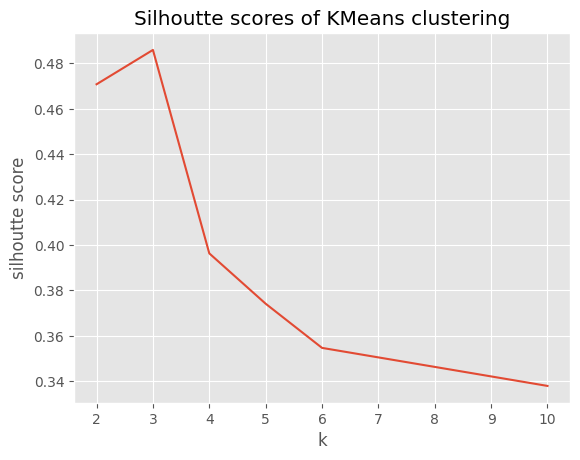

In [21]:
plt.plot(ks, scores)
plt.xlabel("k")
plt.ylabel("silhoutte score")
plt.title("Silhoutte scores of KMeans clustering")
plt.show()

### What is the "right" value for k in a given K-means clustering problem?

When we have unlabeled data, there may be no "right" value for k. We thus do our best, using a heuristic measure that helps us determine a "good" value. That is the purpose served by the silhouette score. Try changing the number of blobs generated in the data and see if the silhouette score always give us a value for k that is equal to the number of ground truth classes in our synthetic data. It won't!

__Also observe how the contingency matrix looks when you try different values of clusters versus classes.__

## Feedback

In [22]:
def feedback():
    """Provide feedback on the contents of this exercise

    Returns:
        string
    """
    # YOUR CODE HERE
    return "This is was a good activity to do. I found an import for contingency matrix and used that, instead of following the hint."

In [23]:
feedback()

'This is was a good activity to do. I found an import for contingency matrix and used that, instead of following the hint.'